# Actualización Bayesiana Continua

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/1/18/Bayes%27_Theorem_MMB_01.jpg" width="500px" height="300px" />

> Como en la vida, que vamos actualizando nuestro conocimiento del mundo con cada nueva experiencia, en inferencia Bayesiana, con cada dato o conjunto de datos que obtenemos, podemos actualizar nuestro conocimiento acerca de la situación que estamos interesados.

> **Objetivos:**
> - Comprender una familia de distributiones parametrizadas que representa un rango continuo de hipótesis para los datos observados.
> - Aplicar el teorema de Bayes para actualizar la densidad de probabilidad dados los datos y una distribución posterior.
> - Interpretar y usar probabilidades predictivas posteriores.

> **Referencias:**
> - https://ocw.mit.edu/courses/18-05-introduction-to-probability-and-statistics-spring-2022/mit18_05_s22_statistics.pdf

## 1. Introducción

Hasta ahora hemos hecho actualización Bayesiana solo con un conjunto finito de hipótesis, por ejemplo, en el ejemplo de las monedas, solo teníamos tres tipos de monedas. Ahora estudiaremos la actualización Bayesiana cuando tenemos un rango continuo de hipótesis.

El procedimiento será prácticamente el mismo que en el caso discreto. Como es usual, cambiaremos la pmf por pdf y sumas por integrales.

**¿Cuándo tenemos rangos continuos de hipótesis?**

1. Supongamos que tenemos un sistema que puede tener éxito con probabilidad $p$ y fallar con probabilidad $1-p$. Podemos hacer la hipótesis de que $p \in [0,1]$. Es decir, tenemos un rango continuo de hipótesis, una para cada $p \in [0,1]$. Este tipo de ejemplos se modelan comúnmente con una moneda desconocida.

2. En principio los parámetros $\mu$ y $\sigma$ en una distribución normal, pueden ser números reales en $(-\infty, \infty)$ y $(0, \infty)$, respectivamente. Si modelamos la duración gestacional (embarazo) para nacimientos individuales con una distribución normal, después de actualizar con millones de datos, nos daremos cuenta que $\mu$ está alrededor de 40 semanas y $\sigma$ está alrededor de una semana.

En los ejemplos anteriores, las hipótesis toman la forma de *cierto parámetro tiene valor $\theta$*. Usaremos la letra $\theta$ para denotar una hipótesis arbitraria.

## 2. Previas continuas, verosimilitudes discretas

En la clase pasada, tanto la probabilidad previa como la verosimilitud eran discretas. Veamos el siguiente ejemplo:

**Ejemplo.** Supongamos que tenemos una moneda con probabilidad desconocida $\theta$ de caer en cara. El valor de $\theta$ es aleatorio y podría ser cualquier cosa entre 0 y 1.

Para este ejemplo, supongamos que $\theta$ sigue una pdf previa continua $p(\theta) = 2 \theta$. 

Tenemos una verosimilitud discreta dado que tirar una moneda solo tiene dos posibles resultados:

$$
p(x=1 | \theta) = \theta, \qquad p(x=0 | \theta) = 1 - \theta.
$$

Entonces, usando la regla de Bayes, obtenemos que:

$$
p(\theta | x) = \frac{p(x | \theta) p(\theta)}{p(x)}.
$$

En este caso, la *ley de probabilidad total* la escribimos como $p(x) = \int_{-\infty}^{\infty} p(x | \theta) p(\theta) \text{d}\theta$. En el caso particular en que tengamos el dato que la moneda cayó cara, toma la forma:

$$
p(x=1) = \int_{0}^{1} p(x=1 | \theta) p(\theta) \text{d}\theta = \int_{0}^{1} \theta \cdot 2\theta \text{d}\theta = \frac{2}{3}.
$$

**Nota.** Precisamente la ley de probabilidad total será, en general, bastante compleja de calcular en la mayoría de los casos, por lo que luego nos decantaremos por métodos numéricos para aproximar la distribución posterior.

Ahora que tenemos todos los ingredientes, escribimos nuestra tabla de actualziación Bayesiana, teniendo en mente que:

> No podemos enumerar una fila para cada hipótesis. Solo escribimos una.

Supongamos que observamos en tres tiros de la moneda, la secuencia cara-cara-sello. Calculemos la pdf posterior para $\theta$:

| Hipótesis | Rango          | Previa                                     | Verosimilitud              | Numerador de Bayes                                         | Posterior                  |
| --------- | -------------- | ------------------------------------------ | -------------------------- | ---------------------------------------------------------- | -------------------------- |
| $\theta$  | rango $\theta$ | $p(\theta)$                                | $p(x = 1, 1, 0 \| \theta)$ | $p(x = 1, 1, 0 \| \theta)p(\theta)$                        | $p(\theta \| x = 1, 1, 0)$ |
|           |                |                                            |                            |                                                            |                            |
| $\theta$  | [0, 1]         | $2 \theta$                                 | $\theta^2(1-\theta)$       | $2 \theta^3 (1-\theta)$                                    | $20 \theta^3 (1-\theta)$   |
|           |                |                                            |                            |                                                            |                            |
| total     | [0, 1]         | $\int_{0}^{1} 2 \theta \text{d}\theta = 1$ | NO SUMA                    | $\int_{0}^{1} 2 \theta^3 (1-\theta) \text{d}\theta = 1/10$ | $1$                        |

Es decir, la distribución posterior para $\theta$ después de observar la secuencia cara-cara-sello, es:

$$
p(\theta | x = 1, 1, 0) = 20 \theta^3 (1-\theta).
$$

In [1]:
# Importar pyplot
from matplotlib import pyplot as plt
# Importar numpy
import numpy as np

Text(0.5, 0, '$\\theta$')

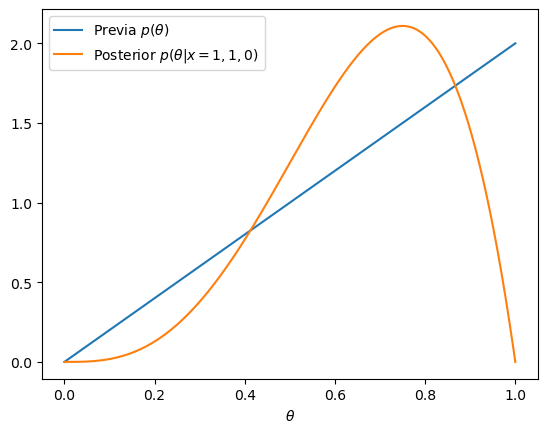

In [2]:
# Dibujar previa y posterior
# Theta
theta = np.linspace(0, 1, 1001)
# Previa
prior = 2 * theta
# Posterior
posterior = 20 * theta**3 * (1 - theta)
# Graficamos
plt.plot(theta, prior, label=r'Previa $p(\theta)$')
plt.plot(theta, posterior, label=r'Posterior $p(\theta|x=1,1,0)$')
plt.legend()
plt.xlabel('$\\theta$')

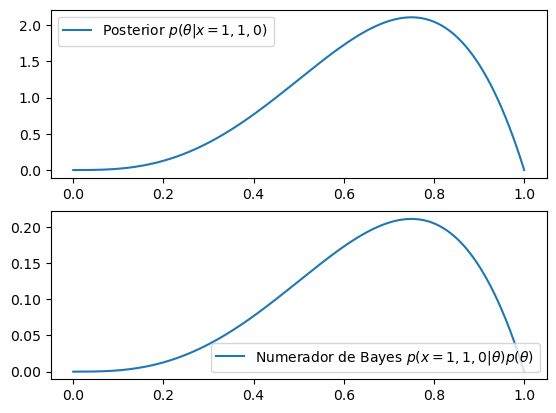

In [3]:
# Graficamos posterior y numerador de Bayes
num_bayes = 2 * theta**3 * (1 - theta)
plt.subplot(2, 1, 1)
plt.plot(theta, posterior, label=r'Posterior $p(\theta|x=1,1,0)$')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(theta, num_bayes, label=r'Numerador de Bayes $p(x=1,1,0|\theta)p(\theta)$')
plt.legend()

Una vez más, incluso para el caso de previas continuas, tenemos que:

$$
p(\text{hipótesis} | \text{datos}) \propto p(\text{datos} | \text{hipótesis}) p(\text{hpótesis})
$$

o equivalentemente:

$$
\text{posterior} \propto \text{verosimilitud} \cdot \text{previa}.
$$

**Ejemplo.** En el ejemplo anterior supusimos una distribución previa particular para $\theta$. Esta distribución $p(\theta)=2 \theta$ implica que hay más probabilidad (previa) de que la moneda caiga cara. ¿Qué pasaría si no tuviéramos conocimiento previo alguno de esta probabilidad?

En este caso, suponemos que la previa es *plana* (uniforme en (0,1)). Similar al ejemplo anterior:

| Hipótesis | Rango          | Previa                              | Verosimilitud              | Numerador de Bayes                                         | Posterior                  |
| --------- | -------------- | ----------------------------------- | -------------------------- | ---------------------------------------------------------- | -------------------------- |
| $\theta$  | [0, 1]         | $1$                                 | $\theta^2(1-\theta)$       | $\theta^2(1-\theta)$                                       | $12 \theta^2 (1-\theta)$   |
|           |                |                                     |                            |                                                            |                            |
| total     | [0, 1]         | $\int_{0}^{1} 1 \text{d}\theta = 1$ | NO SUMA                    | $\int_{0}^{1} \theta^2(1-\theta) \text{d}\theta = 1/12$    | $1$                        |

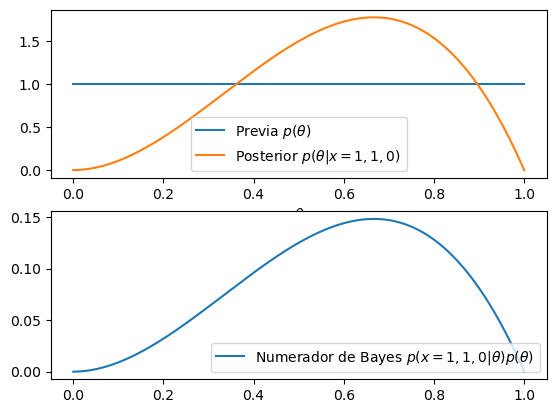

In [4]:
# Dibujar previa y posterior
# Theta
theta = np.linspace(0, 1, 1001)
# Previa
prior = np.ones(1001)
# Posterior
posterior = 12 * theta**2 * (1 - theta)
# Graficamos
plt.subplot(2, 1, 1)
plt.plot(theta, prior, label=r'Previa $p(\theta)$')
plt.plot(theta, posterior, label=r'Posterior $p(\theta|x=1,1,0)$')
plt.legend()
plt.xlabel('$\\theta$')
plt.subplot(2, 1, 2)
num_bayes = theta**2 * (1 - theta)
plt.plot(theta, num_bayes, label=r'Numerador de Bayes $p(x=1,1,0|\theta)p(\theta)$')
plt.legend()

### 2.1. Usando la distribución posterior

Una vez tenemos la distribución posterior, la podemos utilizar para responder preguntas. Por ejemplo:

Con una distribución plana como la anterior, podemos ver que la moneda en principio no está sesgada:

$$
p(\theta > 0.5) = \int_{0.5}^{1} 1 \text{d}\theta = 0.5 = p(\theta < 0.5).
$$

Después de observar la secuencia cara-cara-sello, ¿Está sesgada la moneda?

$$
p(\theta > 0.5 | x = 1, 1, 0) = \int_{0.5}^{1} 12 \theta^2 (1-\theta) \text{d}\theta = 12 \left(\frac{\theta^3}{3} - \frac{\theta^4}{4}\right)_{0.5}^1 = 1 - \frac{5}{16} =\frac{11}{16} > 0.5,
$$

por lo cual, si tenemos indicios de que la moneda tiene más probabilidad a caer cara.

### 2.2. Probabilidades predictivas

Igual que en el caso discreto, es común querer usar las probabilidades posteriores para hacer predicciones de lo que va a suceder.

**Ejemplo.** Continuando con el ejemplo original, tenemos una moneda con probabilidad desconocida $\theta$ de caer cara, y tenemos una pdf previa $p(\theta) = 2 \theta$. Encontrar:

- La probabilidad predictiva previa de que caiga cara.
- Suponga que se hace un tiro, y cae cara. Encuentre la probabilidad predictiva posterior de que caiga cara.

Sean $x_1$ y $x_2$ los resultados de los tiros 1 y 2 de la moneda, respectivamente.

Para la probabilidad predictiva previa tenemos que:

$$
p(x_1 = 1) = \int_{0}^{1} p(x_1 = 1 | \theta) p(\theta) \text{d}\theta = \int_{0}^{1} 2 \theta^2 \text{d}\theta = \frac{2}{3}.
$$

Para la probabilidad predictiva posterior, actualizamos a la posterior:

| Hipótesis | Rango          | Previa                                    | Verosimilitud  | Numerador de Bayes                                | Posterior                  |
| --------- | -------------- | ----------------------------------------- | -------------- | ------------------------------------------------- | -------------------------- |
| $\theta$  | [0, 1]         | $2\theta$                                 | $\theta$       | $2\theta^2$                                       | $3 \theta^2$               |
|           |                |                                           |                |                                                   |                            |
| total     | [0, 1]         | $\int_{0}^{1} 2\theta \text{d}\theta = 1$ | NO SUMA        | $\int_{0}^{1} 2\theta^2 \text{d}\theta = 2/3$     | $1$                        |

Con lo anterior,

$$
p(x_2=1 | x_1=1) = \int_{0}^{1} p(x_2 = 1 | \theta, x_1 = 1) p(\theta | x_1 = 1) \text{d}\theta = \int_{0}^{1} \theta \cdot 3 \theta^2 \text{d}\theta = \frac{3}{4}.
$$

## 3. Todo continuo: previas continuas, verosimilitudes continuas

Igual que antes, las ideas siguen siendo las mismas, con algunos detalles técnicos. Veámoslo con un ejemplo.

**Ejemplo: Hipótesis y datos normales.**  Supongamos que tenemos un dato $x=5$ que obtuvimos de una distribución normal con media $\theta$ y varianza 1 (uno):

$$
x \sim \text{Normal}(\theta, 1).
$$

Ahora, supongamos que nuestra previa para el parámetro $\theta$ es $\theta \sim \text{Normal}(2, 1)$.

Encontremos la distribución posterior. Tenemos que la previa es:

$$
p(\theta) = \frac{1}{\sqrt{2 \pi}}e^{-(\theta - 2)^2/2}.
$$

La verosimilitud es:

$$
p(x=5 | \theta) = \frac{1}{\sqrt{2 \pi}}e^{-(5 - \theta)^2/2}.
$$

Para obtener el numerador de Bayes, multiplicamos la previa y la verosimilitud:

$$
\begin{align} \nonumber
p(\theta) \cdot p(x=5 | \theta) & = & \frac{1}{\sqrt{2 \pi}}e^{-(\theta - 2)^2/2} \cdot \frac{1}{\sqrt{2 \pi}}e^{-(5 - \theta)^2/2} \\ \nonumber
& = & \frac{1}{2 \pi} e^{-(2 \theta^2 - 14 \theta + 29) / 2} \\ \nonumber
& = & \frac{1}{2 \pi} e^{-(\theta^2 - 7 \theta + 29/2)} & \qquad \text{(completamos el cuadrado)} \\ \nonumber
& = & \frac{1}{2 \pi} e^{-(\theta - 7/2)^2 - 9/4} \\ \nonumber
& = & \frac{e^{- 9/4}}{2 \pi} e^{-(\theta - 7/2)^2} \\ \nonumber
& = & c_1 e^{-(\theta - 7/2)^2}
\end{align}
$$

Con lo anterior:

| Hipótesis | Previa                                        | Verosimilitud                                 | Numerador de Bayes          | Posterior                   |
| --------- | --------------------------------------------- | --------------------------------------------- | --------------------------- | --------------------------- |
| $\theta$  | $\frac{1}{\sqrt{2 \pi}}e^{-(\theta - 2)^2/2}$ | $\frac{1}{\sqrt{2 \pi}}e^{-(5 - \theta)^2/2}$ | $c_1 e^{-(\theta - 7/2)^2}$ | $c_2 e^{-(\theta - 7/2)^2}$ |
|           |                                               |                                               |                             |                             |
| total     | $1$                                           | NO SUMA                                       | $\int_{-\infty}^{\infty} c_1 e^{-(\theta - 7/2)^2} \text{d}\theta = c1/c2$     | $1$                        |

Notemos que la constante en el último paso del producto, la resumimos en la constante $c_1$.

Por la forma de la posterior, vemos que es una distribución normal, dado que la forma  de la exponencial para una normal es:

$$
e^{-(\theta - \mu)^2/2\sigma^2}.
$$

Lo cual significa que $\mu = 7/2$ y $\sigma^2 = 1/2$.

No es necesario calcular la probabilidad total (integral del numerador de Bayes). Nosotros ya sabemos que $\frac{1}{\sigma\sqrt{2 \pi}}$ es la constante que normaliza una distribución normal. Por tanto, **la distribución posterior sigue una distribución** $\text{Normal}(7/2,1/2)$.

In [5]:
# Importamos scipy.stats
from scipy import stats

Text(0.5, 0, '$\\theta$')

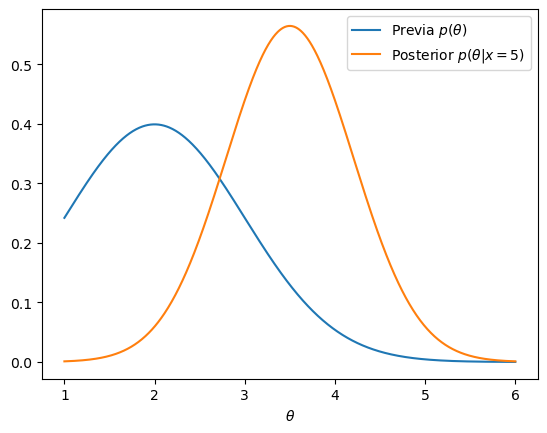

In [9]:
# Dibujar previa y posterior
# Theta
theta = np.linspace(1, 6, 1001)
# Previa
prior = stats.norm(loc=2, scale=1)
# Posterior
post = stats.norm(loc=7 / 2, scale=np.sqrt(1 / 2))
# Graficamos
plt.plot(theta, prior.pdf(theta), label=r'Previa $p(\theta)$')
plt.plot(theta, post.pdf(theta), label=r'Posterior $p(\theta|x=5)$')
plt.legend()
plt.xlabel('$\\theta$')

Text(0.5, 0, '$\\theta$')

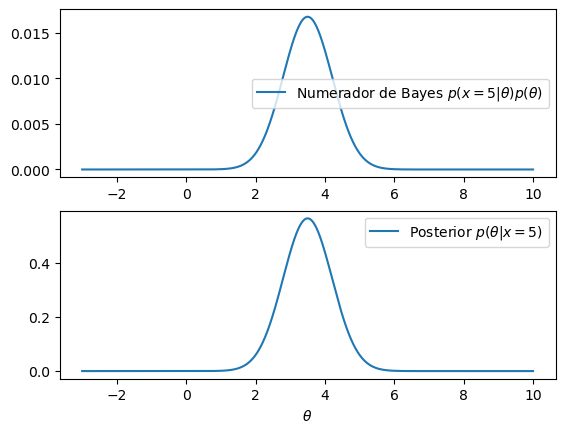

In [8]:
# Numerador de Bayes
likelihood = stats.norm(
    loc=5, scale=1
)
num_bayes = likelihood.pdf(theta) * prior.pdf(theta)
# Graficamos
plt.subplot(2, 1, 1)
plt.plot(theta, num_bayes, label=r'Numerador de Bayes $p(x=5|\theta)p(\theta)$')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(theta, post.pdf(theta), label=r'Posterior $p(\theta|x=5)$')
plt.legend()
plt.xlabel('$\\theta$')

Si repetimos lo anterior para un $x$ arbitrario:

| Hipótesis | Previa                                        | Verosimilitud                                 | Numerador de Bayes                | Posterior                         |
| --------- | --------------------------------------------- | --------------------------------------------- | --------------------------------- | --------------------------------- |
| $\theta$  | $\frac{1}{\sqrt{2 \pi}}e^{-(\theta - 2)^2/2}$ | $\frac{1}{\sqrt{2 \pi}}e^{-(x - \theta)^2/2}$ | $c_1 e^{-(\theta - (1 + x/2))^2}$ | $c_2 e^{-(\theta - (1 + x/2))^2}$ |
| $\theta$  | $\theta \sim \text{Normal}(2, 1)$             | $x \sim \text{Normal}(\theta, 1)$             |                                   | $\theta \sim \text{Normal}(1 + x/2, 1/2)$ |
|           |                                               |                                               |                                   |                                   |
| total     | $1$                                           | NO SUMA                                       | $c1/c2$                           | $1$                               |

La posterior sigue una $\text{Normal}(1 + x/2, 1/2)$.

In [ ]:
# Dibujar previa y posterior
# Theta

# Previa

# Posterior

# Graficamos


<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>